# **FINDING ANSWERERS ON STACK OVERFLOW**

ANEGHA JAIN-20BCE1547

MEGHA NATH-20BCE1581



# Note for Editor

*   Raw data name: data
*   Preprocessed data name (only features): df
*   Data to be used in fitting model: usedf
*   Extracted feature data: X_new
*   Class labels after clustering: y



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/QueryResults (1).csv")

In [ ]:
data.head(10)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,39921412,1,39921577.0,NaN,2016-10-07 15:58:04,NaN,-4,426.0,<p>I am new to C++ and still learning it.I did...,6938079.0,...,2016-10-07 16:34:01,2016-10-07 16:34:01,C++ input string crash,<c++>,1.0,5,NaN,2016-10-14 22:00:35,NaN,CC BY-SA 3.0
1,39921413,1,NaN,NaN,2016-10-07 15:58:16,NaN,2,7204.0,<p>I have googled some examples of C# default ...,4985240.0,...,NaN,2016-10-07 16:05:15,"C# set default argument, string array (string[])",<c#><parameters><default>,2.0,3,NaN,2016-10-07 16:08:03,NaN,CC BY-SA 3.0
2,39921414,1,NaN,NaN,2016-10-07 15:58:17,NaN,0,90.0,<p>I have a gridview in my asp.net web applica...,6938150.0,...,2016-10-07 16:03:44,2016-10-07 16:03:44,How do I also export result returned from my s...,<c#><asp.net>,0.0,5,NaN,NaN,NaN,CC BY-SA 3.0
3,39921415,2,NaN,39909249.0,2016-10-07 15:58:18,NaN,1,NaN,<p>The brackets in quotes in the <code>A</code...,448932.0,...,NaN,2016-10-07 15:58:18,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 3.0
4,39921416,2,NaN,39921376.0,2016-10-07 15:58:29,NaN,0,NaN,<p>You need to invoke <code>mat.group()</code>...,2353911.0,...,2016-10-07 15:59:16,2016-10-07 15:59:16,NaN,NaN,NaN,2,NaN,NaN,NaN,CC BY-SA 3.0
5,39921417,2,NaN,39921316.0,2016-10-07 15:58:29,NaN,0,NaN,"<pre><code>var srcPath = item.closest(""tr"").fi...",3049893.0,...,NaN,2016-10-07 15:58:29,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 3.0
6,39921418,2,NaN,28937707.0,2016-10-07 15:58:30,NaN,0,NaN,<p>When you add a folder to your solution and ...,4009376.0,...,NaN,2016-10-07 15:58:30,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 3.0
7,39921419,1,NaN,NaN,2016-10-07 15:58:38,NaN,-1,323.0,"<p>No matter which library I use for node, the...",680761.0,...,2016-10-26 17:42:31,2016-10-26 17:42:31,Why must I include the host with URLs with nod...,<node.js><express><isomorphic-fetch-api>,1.0,7,NaN,NaN,NaN,CC BY-SA 3.0
8,39921420,2,NaN,39856693.0,2016-10-07 15:58:38,NaN,0,NaN,<p>Many thanks to Ansgar Wiechers</p>\n\n<p>I ...,6252731.0,...,NaN,2016-10-07 15:58:38,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 3.0
9,39921421,2,NaN,37895385.0,2016-10-07 15:58:40,NaN,2,NaN,"<p>There is no way to bulk-delete, however, th...",2254886.0,...,NaN,2016-10-07 15:58:40,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 3.0


In [ ]:
data.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')

In [ ]:
print(data.shape)
print(data.size)

(40000, 23)
920000


In [ ]:
df=data.drop(['DeletionDate','ViewCount','OwnerDisplayName','LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate','CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],axis='columns')
df.head(6)
print(df.shape)

(40000, 11)


In [ ]:
df.dtypes

Id                    int64
PostTypeId            int64
AcceptedAnswerId    float64
ParentId            float64
CreationDate         object
Score                 int64
Body                 object
OwnerUserId         float64
Title                object
Tags                 object
AnswerCount         float64
dtype: object

In [ ]:
bool_series = df.isnull()
 
# filtering data
# displaying data only with team = NaN
df[bool_series]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,Body,OwnerUserId,Title,Tags,AnswerCount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.fillna(0)
#df['AcceptedAnswerId']=df['AcceptedAnswerId'].fillna(0)
#df['AnswerCount']=df['AnswerCount'].fillna(0)

df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,Body,OwnerUserId,Title,Tags,AnswerCount
0,39921412,1,39921577.0,0.0,2016-10-07 15:58:04,-4,<p>I am new to C++ and still learning it.I did...,6938079.0,C++ input string crash,<c++>,1.0
1,39921413,1,0.0,0.0,2016-10-07 15:58:16,2,<p>I have googled some examples of C# default ...,4985240.0,"C# set default argument, string array (string[])",<c#><parameters><default>,2.0
2,39921414,1,0.0,0.0,2016-10-07 15:58:17,0,<p>I have a gridview in my asp.net web applica...,6938150.0,How do I also export result returned from my s...,<c#><asp.net>,0.0
3,39921415,2,0.0,39909249.0,2016-10-07 15:58:18,1,<p>The brackets in quotes in the <code>A</code...,448932.0,0,0,0.0
4,39921416,2,0.0,39921376.0,2016-10-07 15:58:29,0,<p>You need to invoke <code>mat.group()</code>...,2353911.0,0,0,0.0


In [ ]:
questions= df[df['PostTypeId'] ==1]
questions=questions.drop(['ParentId'],axis="columns")
questions.shape

(13395, 10)

In [ ]:
answers=df[df["PostTypeId"]==2]
answers.shape

(26561, 11)

### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
questions.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score', 'Body',
       'OwnerUserId', 'Title', 'Tags', 'AnswerCount'],
      dtype='object')

In [ ]:
usedf = questions.drop(['CreationDate','Body','Title','Tags'],axis='columns')
usedf=usedf.astype(float)
usedf.dtypes

Id                  float64
PostTypeId          float64
AcceptedAnswerId    float64
Score               float64
OwnerUserId         float64
AnswerCount         float64
dtype: object

# Fuzzy C Means Clustering

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
from sklearn.cluster import KMeans
from fcmeans import FCM

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

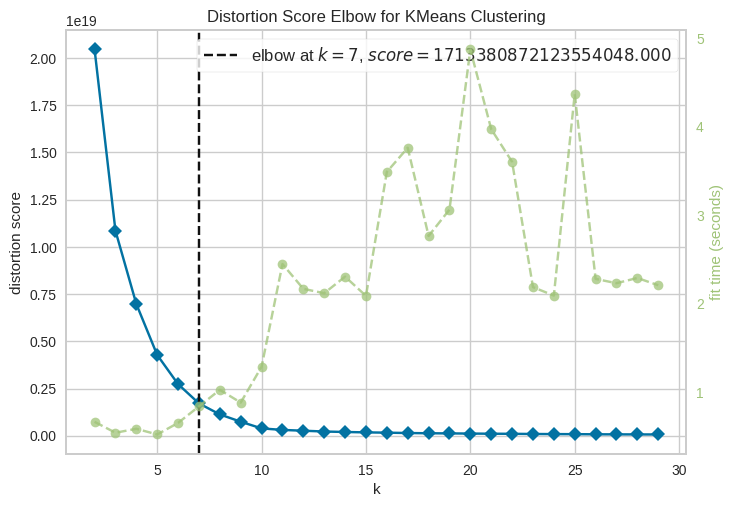

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df.drop(['CreationDate','Body','Title','Tags'],axis='columns'))        # Fit data to visualizer
visualizer.show()  

In [ ]:
model = FCM(n_clusters=7) # we use two cluster as an example
model.fit(usedf.to_numpy()) ## X, numpy array. rows:samples columns:features

In [ ]:
centers = model.centers
labels = model.predict(usedf.to_numpy())

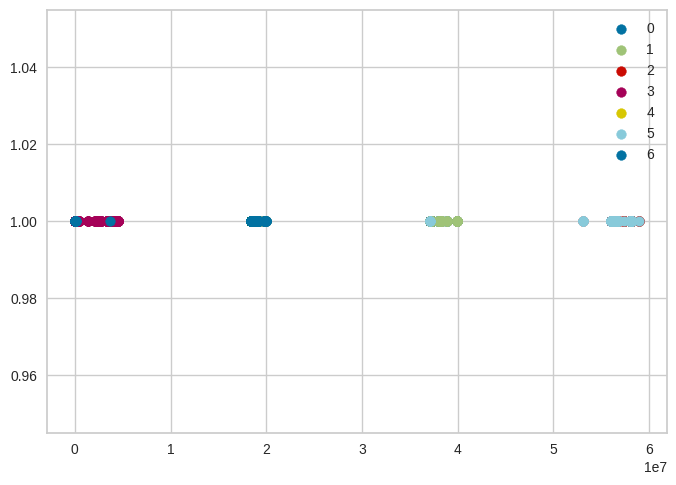

In [ ]:
import matplotlib.pyplot as plt
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(usedf.to_numpy()[labels == i , 0] , usedf.to_numpy()[labels == i , 1] , label = i)
plt.legend()
plt.show()

### Investigation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

NameError: ignored

<Figure size 1000x500 with 0 Axes>

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters= 7)
label = kmeans.fit_predict(usedf.to_numpy())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


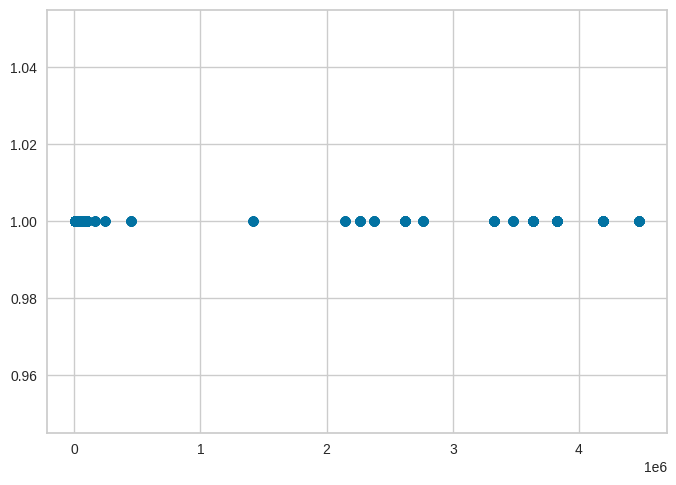

In [ ]:
import matplotlib.pyplot as plt
filtered_label0 = usedf.to_numpy()[label == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

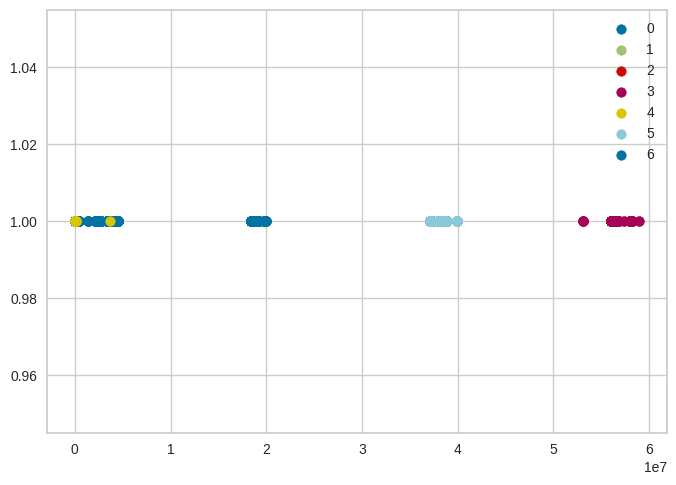

In [ ]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(usedf.to_numpy()[label == i , 0] , usedf.to_numpy()[label == i , 1] , label = i)
plt.legend()
plt.show()

# Cascaded Clustering

In [ ]:
usedf['cluster']=label

In [ ]:
usedf.head()

,Id,PostTypeId,AcceptedAnswerId,Score,OwnerUserId,AnswerCount,cluster
0,39921412.0,1.0,39921577.0,-4.0,6938079.0,1.0,2
1,39921413.0,1.0,0.0,2.0,4985240.0,2.0,5
2,39921414.0,1.0,0.0,0.0,6938150.0,0.0,5
7,39921419.0,1.0,0.0,-1.0,680761.0,1.0,5
11,39921423.0,1.0,0.0,1.0,3263656.0,0.0,5


In [ ]:
ansdf=answers.drop(['CreationDate','Body','Title','Tags'],axis='columns')
ansdf.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,Score,OwnerUserId,AnswerCount
3,39921415,2,0.0,39909249.0,1,448932.0,0.0
4,39921416,2,0.0,39921376.0,0,2353911.0,0.0
5,39921417,2,0.0,39921316.0,0,3049893.0,0.0
6,39921418,2,0.0,28937707.0,0,4009376.0,0.0
8,39921420,2,0.0,39856693.0,0,6252731.0,0.0


In [ ]:
usedf.rename(columns = {'Id':'QId'}, inplace = True)
ansdf.rename(columns={'ParentId':'QId'}, inplace=True)

In [ ]:
def get_answerers(i):
  cluster_i=usedf[usedf['cluster']==i]
  cluster_i=usedf.drop(['cluster'],axis=1)
  kmeans_i = KMeans(n_clusters= 5)
  label_i= kmeans_i.fit_predict(cluster_i.to_numpy())
  answers_i = pd.merge(cluster_i, ansdf, on='QId', how='inner')
  answerers_i=np.array(answers_i['OwnerUserId_y'])
  return(answerers_i)

In [ ]:
list=[]
for i in range(len(get_answerers(2))):
  if(i<=10):
    list.append(get_answerers(2)[i])
  else:
    break
print(list)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[4323.0, 6117.0, 187606.0, 226937.0, 131887.0, 508842.0, 467210.0, 469895.0, 187606.0, 449554.0, 376386.0]


# Feature Extraction

In [ ]:
questions.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,Body,OwnerUserId,Title,Tags,AnswerCount
0,39921412,1,39921577.0,2016-10-07 15:58:04,-4,<p>I am new to C++ and still learning it.I did...,6938079.0,C++ input string crash,<c++>,1.0
1,39921413,1,0.0,2016-10-07 15:58:16,2,<p>I have googled some examples of C# default ...,4985240.0,"C# set default argument, string array (string[])",<c#><parameters><default>,2.0
2,39921414,1,0.0,2016-10-07 15:58:17,0,<p>I have a gridview in my asp.net web applica...,6938150.0,How do I also export result returned from my s...,<c#><asp.net>,0.0
7,39921419,1,0.0,2016-10-07 15:58:38,-1,"<p>No matter which library I use for node, the...",680761.0,Why must I include the host with URLs with nod...,<node.js><express><isomorphic-fetch-api>,1.0
11,39921423,1,0.0,2016-10-07 15:58:42,1,<p>I have an Aurelia app where I want to have ...,3263656.0,Aurelia UI virtualization with flex box divs (...,<javascript><css><aurelia><ui-virtualization>,0.0


In [ ]:
questions['class label']=label

In [ ]:
touse=questions.drop(['CreationDate','Body','Title','Tags'],axis=1)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=4)

In [ ]:
X=touse.drop(['class label'],axis=1)
y=touse['class label']

In [ ]:
X.head()

,Id,PostTypeId,AcceptedAnswerId,Score,OwnerUserId,AnswerCount
0,39921412,1,39921577.0,-4,6938079.0,1.0
1,39921413,1,0.0,2,4985240.0,2.0
2,39921414,1,0.0,0,6938150.0,0.0
7,39921419,1,0.0,-1,680761.0,1.0
11,39921423,1,0.0,1,3263656.0,0.0


In [ ]:
y.head()

0     2
1     5
2     5
7     5
11    5
Name: class label, dtype: int32

In [ ]:
X_new=rfe.fit_transform(X,y)

In [ ]:
X_new

array([[3.9921412e+07, 3.9921577e+07, 6.9380790e+06, 1.0000000e+00],
       [3.9921413e+07, 0.0000000e+00, 4.9852400e+06, 2.0000000e+00],
       [3.9921414e+07, 0.0000000e+00, 6.9381500e+06, 0.0000000e+00],
       ...,
       [9.9488000e+04, 1.0026600e+05, 1.3564000e+04, 4.0000000e+00],
       [9.9497000e+04, 4.2970300e+05, 1.8515000e+04, 4.0000000e+00],
       [9.9510000e+04, 9.9532000e+04, 3.1530000e+03, 1.2000000e+01]])

# MLP

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(786, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                75        
                                                                 
 dense_1 (Dense)             (None, 512)               8192      
                                                                 
 dense_2 (Dense)             (None, 786)               403218    
                                                                 
 dense_3 (Dense)             (None, 7)                 5509      
                                                                 
Total params: 416,994
Trainable params: 416,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
335/335 [==============================] - 4s 9ms/step - loss: 236888.2969 - accuracy: 0.2991
Epoch 2/10
335/335 [==============================] - 3s 10ms/step - loss: 36098.6328 - accuracy: 0.3317
Epoch 3/10
335/335 [==============================] - 8s 25ms/step - loss: 19187.0508 - accuracy: 0.3385
Epoch 4/10
335/335 [==============================] - 6s 18ms/step - loss: 9353.8604 - accuracy: 0.3524
Epoch 5/10
335/335 [==============================] - 7s 22ms/step - loss: 5368.0420 - accuracy: 0.3532
Epoch 6/10
335/335 [==============================] - 6s 17ms/step - loss: 2682.6494 - accuracy: 0.3776
Epoch 7/10
335/335 [==============================] - 6s 19ms/step - loss: 2139.7043 - accuracy: 0.3752
Epoch 8/10
335/335 [==============================] - 4s 13ms/step - loss: 1330.8073 - accuracy: 0.3904
Epoch 9/10
335/335 [==============================] - 3s 9ms/step - loss: 1127.8967 - accuracy: 0.3926
Epoch 10/10
335/335 [==============================] - 4s 11ms

# ENSEMBLE LEARNING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [ ]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = [dtc,rfc,knn]
for algo in clf:
    score = cross_val_score( algo,X_new,y,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.9999253452780887
The accuracy score of RandomForestClassifier() is: 0.9998506905561776
The accuracy score of KNeighborsClassifier() is: 0.9997013811123553


In [ ]:
clf = [('dtc',dtc),('rfc',rfc),('knn',knn)]

In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,X_new,y,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of is: 0.9999253452780887


In [ ]:
%%shell
jupyter nbconvert --to html /content/SIN_jcomp.ipynb

[NbConvertApp] WARNING | pattern '/content/SIN_jcomp.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

CalledProcessError: ignored

# EXTRA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tags=pd.read_csv("/content/Tags.csv")

In [ ]:
tags.sort_values(by=['Count'], ascending=False)

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(tags["TagName"][0:10], tags["Count"][0:10])